In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

np.random.seed(1)

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m))
    
    probabs, cache = L_model_forward(X, parameters)
    
    for i in range(0, probabs.shape[1]):
        if probabs[0, i]>0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    acc = str(np.sum(p==y)/m)
    print("Acuuracy :"+acc)
    
    return p

In [4]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from utils import *

In [5]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1, so it's a cat picture


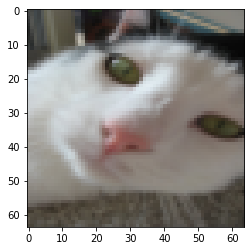

In [6]:
index = 14
plt.imshow(train_x_orig[index])
print("y = "+str(train_y[0, index]) + ", so it's a " + classes[train_y[0, index]].decode("utf-8")+" picture")

In [7]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [8]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.0
test_x = test_x_flatten/255.0

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [9]:
layers_dims = [12288, 20, 7, 5, 1] #6-layers

In [10]:
def model(X, Y, layers_dims, learning_rate, num_iterations):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if(i%100 == 0):
            #print("Cost after "+str(i)+" iterations = "+str(cost))
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.ylabel('Iterations (per hundred)')
    plt.show()
        
    return parameters

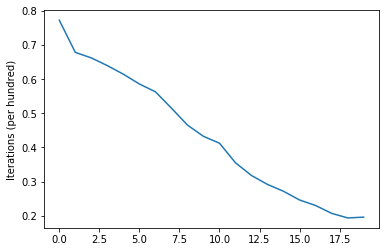

In [11]:
parameters = model(train_x, train_y, layers_dims, 0.005, 2000)

In [12]:
pred_train = predict(train_x, train_y, parameters)

Acuuracy :0.9856459330143541


In [13]:
pred_test = predict(test_x, test_y, parameters)

Acuuracy :0.78
